<a href="https://colab.research.google.com/github/mladekar/EDA-Project-Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
telcom_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis (EDA) Project /Telecom Churn.csv");

In [30]:
# making copy of data
telcom_data = telcom_df.copy()

**1.1 Data Exploration**

In [29]:
telcom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telcom_df.shape

(3333, 20)

In [ ]:
telcom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
# Missing values 
print ("\nMissing values :  ", telcom_df.isnull().sum().values.sum())


Missing values :   0


In [58]:
# Statistics of data 
telcom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**1.2 Checking Churn Rates**

In [5]:
telcom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

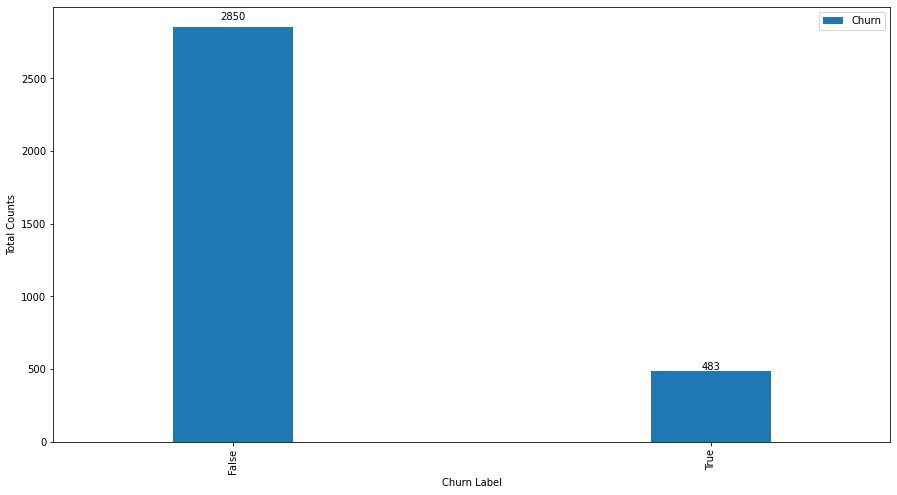

In [6]:
# Customer churn bar plot of whole data
cust_churn=telcom_df['Churn'].value_counts()
ax=cust_churn.plot(kind='bar',figsize=(15,8), width=0.25)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

plt.xlabel("Churn Label")
plt.ylabel("Total Counts")
plt.legend()


In [7]:
print("The percentages of Churn and Not Churn are ",100*telcom_df['Churn'].value_counts()/len(telcom_df['Churn']))

The percentages of Churn and Not Churn are  False    85.508551
True     14.491449
Name: Churn, dtype: float64


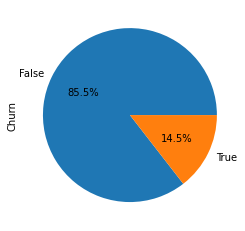

In [8]:
# for better visualization, pie chart can be used
cust_churn.plot.pie(autopct="%.1f%%");

**Inference:** In the above output, we can see that our dataset is not balanced at all i.e. True is approximately 15% and False is approximately 85% .
So we analyze the data with other features while taking the target values separately to get some insights.

**1.3 Data Preprocessing**

In [9]:
#Dropping Account Length as it doesnt make a sense here
telcom_df = telcom_df.drop('Account length',axis=1)


In [10]:
telcom_df.head(2)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [15]:
telcom_df.shape

(3333, 19)

In [ ]:
# Replacing Yes/No values with 1 and 0
# Here as we know we can’t have character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No = 0

telcom_df['International plan'] = telcom_df['International plan'].replace({"Yes":1,"No":0}).astype(int)
telcom_df['Voice mail plan'] = telcom_df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

In [ ]:
telcom_df.head(2)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [20]:
#Separating churn and non churn customers
churn     = telcom_df[telcom_df["Churn"] == bool(True)]
not_churn = telcom_df[telcom_df["Churn"] == bool(False)]

In [ ]:
churn.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,408,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,408,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,408,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [ ]:
churn.shape

(483, 19)

In [ ]:
not_churn.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
not_churn.shape

(2850, 19)

**1.4 Churn Rate by Area Code**

In [34]:
#Area Code
telcom_df['Area code'].unique()

array([415, 408, 510])

In [35]:
# telcom churn by area code 
telcom_df_by_area_code=telcom_df.groupby('Area code',as_index=False).agg({"Churn":"sum"})
telcom_df_by_area_code.rename(columns={'Churn':'Total_Churn_Count'},inplace=True)
telcom_df_by_area_code


,Area code,Total_Churn_Count
0,408,122
1,415,236
2,510,125


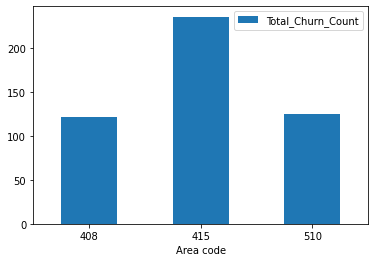

In [39]:
ax1 = telcom_df_by_area_code.plot.bar(x='Area code', y='Total_Churn_Count', rot=0)

**Inference:** This barplot of telecom churn by area code shows that there are more churn in area code-415 as compared to the other areas. 

**1.5 Chrun according to states**

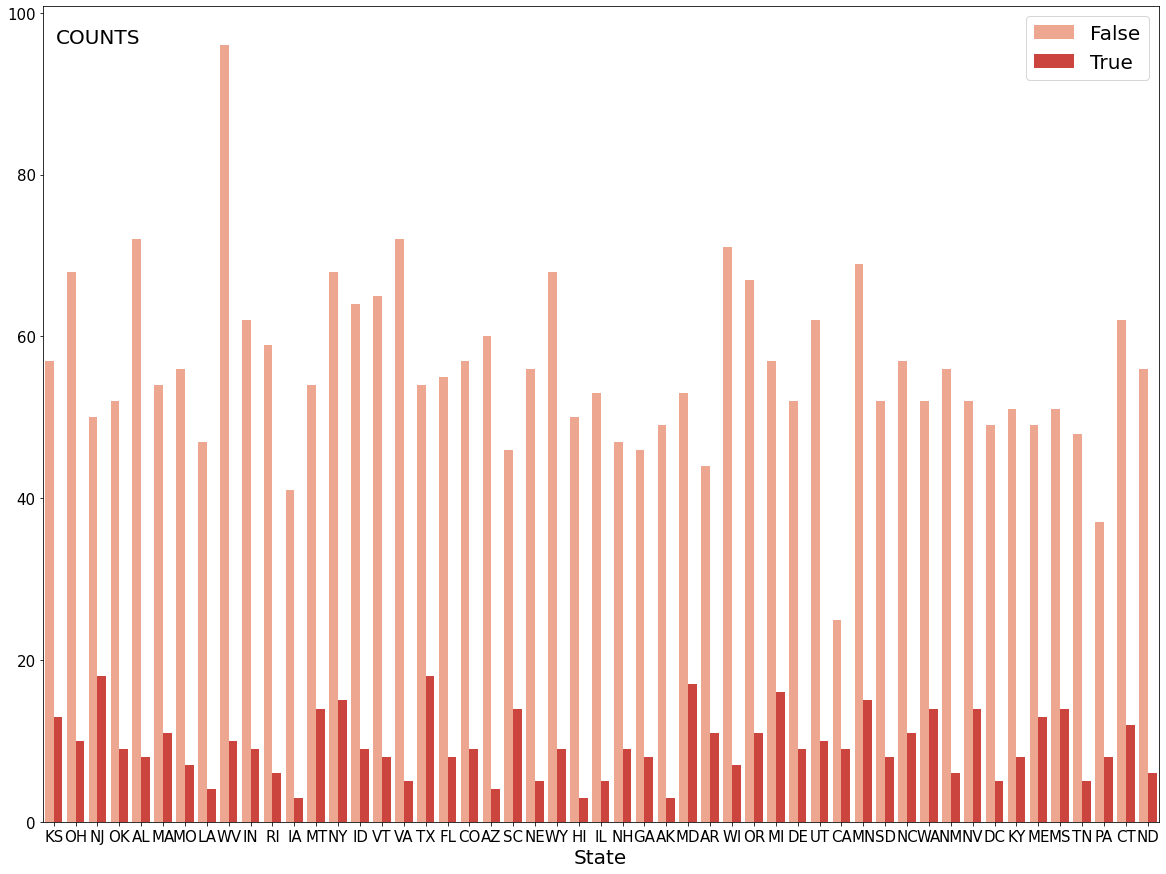

In [41]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='State', hue='Churn', data=telcom_df, palette='Reds')

axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

**Inferences:** States with high churn rate: NJ,TX,MD ( Network upgradation is required in these states)  and States with low churn rate: IA,HI,AK

**1.6 Checking Effect of Voice-Mail Message Feature Over Churn**

In [ ]:
telcom_df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


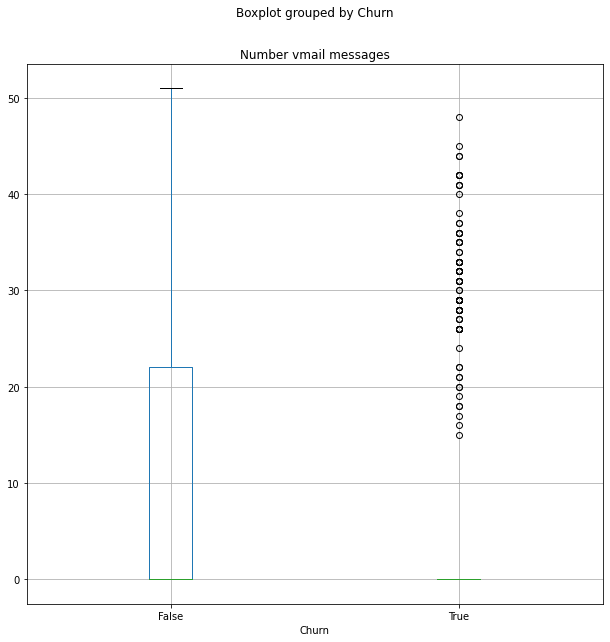

In [ ]:
plt.show()
telcom_df.boxplot(column='Number vmail messages', by='Churn', figsize=(10,10))

**Inference:** We have noticed for Voice-Mail Message Feature when there are more than 15 voice-mail messages then certainly there is a churn. To retain the customer we suggests telecom provider to :
1] Setting up a limit on Voice-Mail service strictly no more than 15 voice mails. 
2] Quality Drop in Voice-Mail after 20 voice mails may be one reason for customer churn.

**1.7 Churn rate by charges ( Day charges, evening charges and night charges)**

Text(0.5, 1.0, 'Day charges by churn')

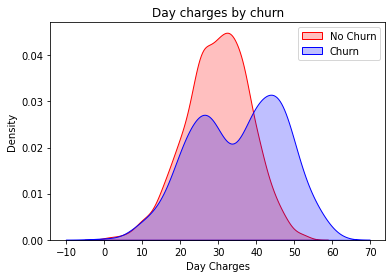

In [44]:
Mth = sns.kdeplot(telcom_df["Total day charge"][(telcom_df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telcom_df["Total day charge"][(telcom_df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Day Charges')
Mth.set_title('Day charges by churn')

Text(0.5, 1.0, 'Eveneing charges by churn')

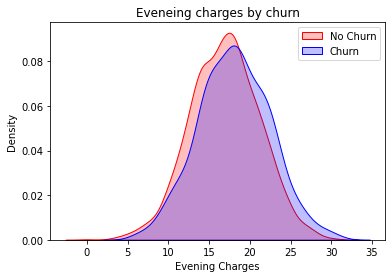

In [47]:
Mth_eve = sns.kdeplot(telcom_df["Total eve charge"][(telcom_df["Churn"] == 0) ],
                color="Red", shade = True)
Mth_eve = sns.kdeplot(telcom_df["Total eve charge"][(telcom_df["Churn"] == 1) ],
                ax =Mth_eve, color="Blue", shade= True)
Mth_eve.legend(["No Churn","Churn"],loc='upper right')
Mth_eve.set_ylabel('Density')
Mth_eve.set_xlabel('Evening Charges')
Mth_eve.set_title('Eveneing charges by churn')

Text(0.5, 1.0, 'Night charges by churn')

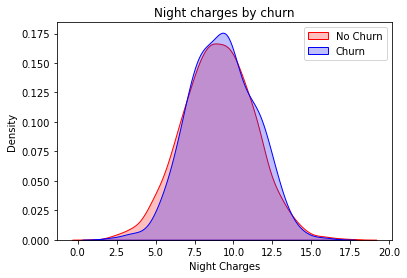

In [50]:
Mth_night = sns.kdeplot(telcom_df["Total night charge"][(telcom_df["Churn"] == 0) ],
                color="Red", shade = True)
Mth_night = sns.kdeplot(telcom_df["Total night charge"][(telcom_df["Churn"] == 1) ],
                ax =Mth_night, color="Blue", shade= True)
Mth_night.legend(["No Churn","Churn"],loc='upper right')
Mth_night.set_ylabel('Density')
Mth_night.set_xlabel('Night Charges')
Mth_night.set_title('Night charges by churn')

**Inferences:** Day charges are higher than evening(medium) and night charges (lower). But the density plot shows that in a day time more charges leads to the churn while in evening and night, eventhough the charges are lower but churn is also high. Hence, it is needed to improve the network during evening and night. 

**1.7 International Calls Affecting the Churn Rate**

In [11]:
print('Maximum number of minutes:',telcom_df['Total intl minutes'].max())
print('Minimum number of minutes:',telcom_df['Total intl minutes'].min())
print('Average number of minutes:',telcom_df['Total intl minutes'].mean())

Maximum number of minutes: 20.0
Minimum number of minutes: 0.0
Average number of minutes: 10.237293729372938


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


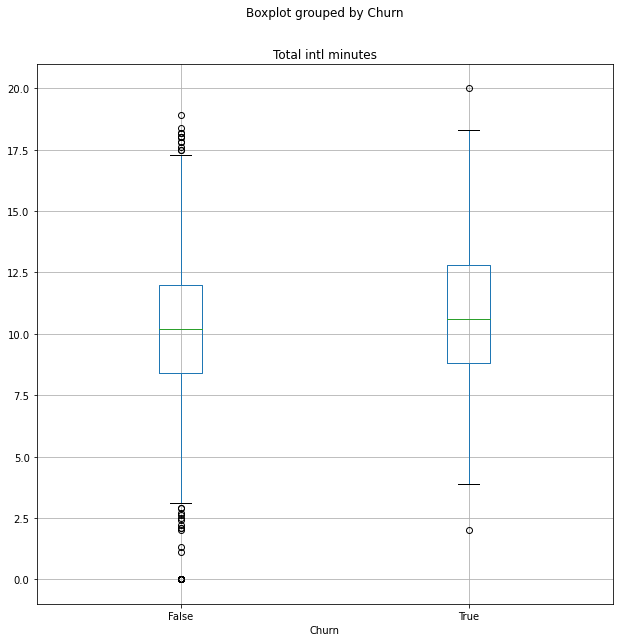

In [12]:
plt.show()
telcom_df.boxplot(column='Total intl minutes', by='Churn',figsize=(10,10))

**Inference:** Users who make the International Call tend to spend more minutes.  

In [ ]:
print('Maximum number of calls:',telcom_df['Total intl calls'].max())
print('Minimum number of calls:',telcom_df['Total intl calls'].min())
print('Average number of calls:',telcom_df['Total intl calls'].mean())

Maximum number of calls: 20
Minimum number of calls: 0
Average number of calls: 4.4794479447944795


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


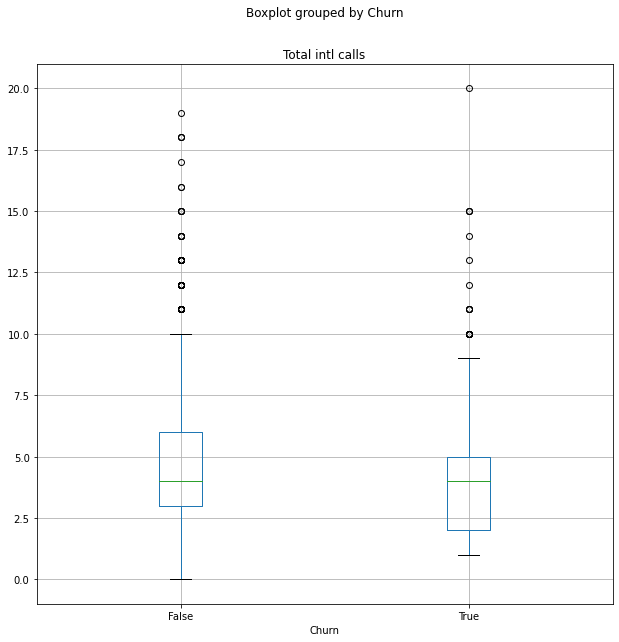

In [ ]:
plt.show()
telcom_df.boxplot(column='Total intl calls', by='Churn', figsize=(10,10))

**Inference:** These Calls clearly indicat that clients without International Plan Suffer and May Leave the Operator.

**1.8 Data Correlation Using Heatmap**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


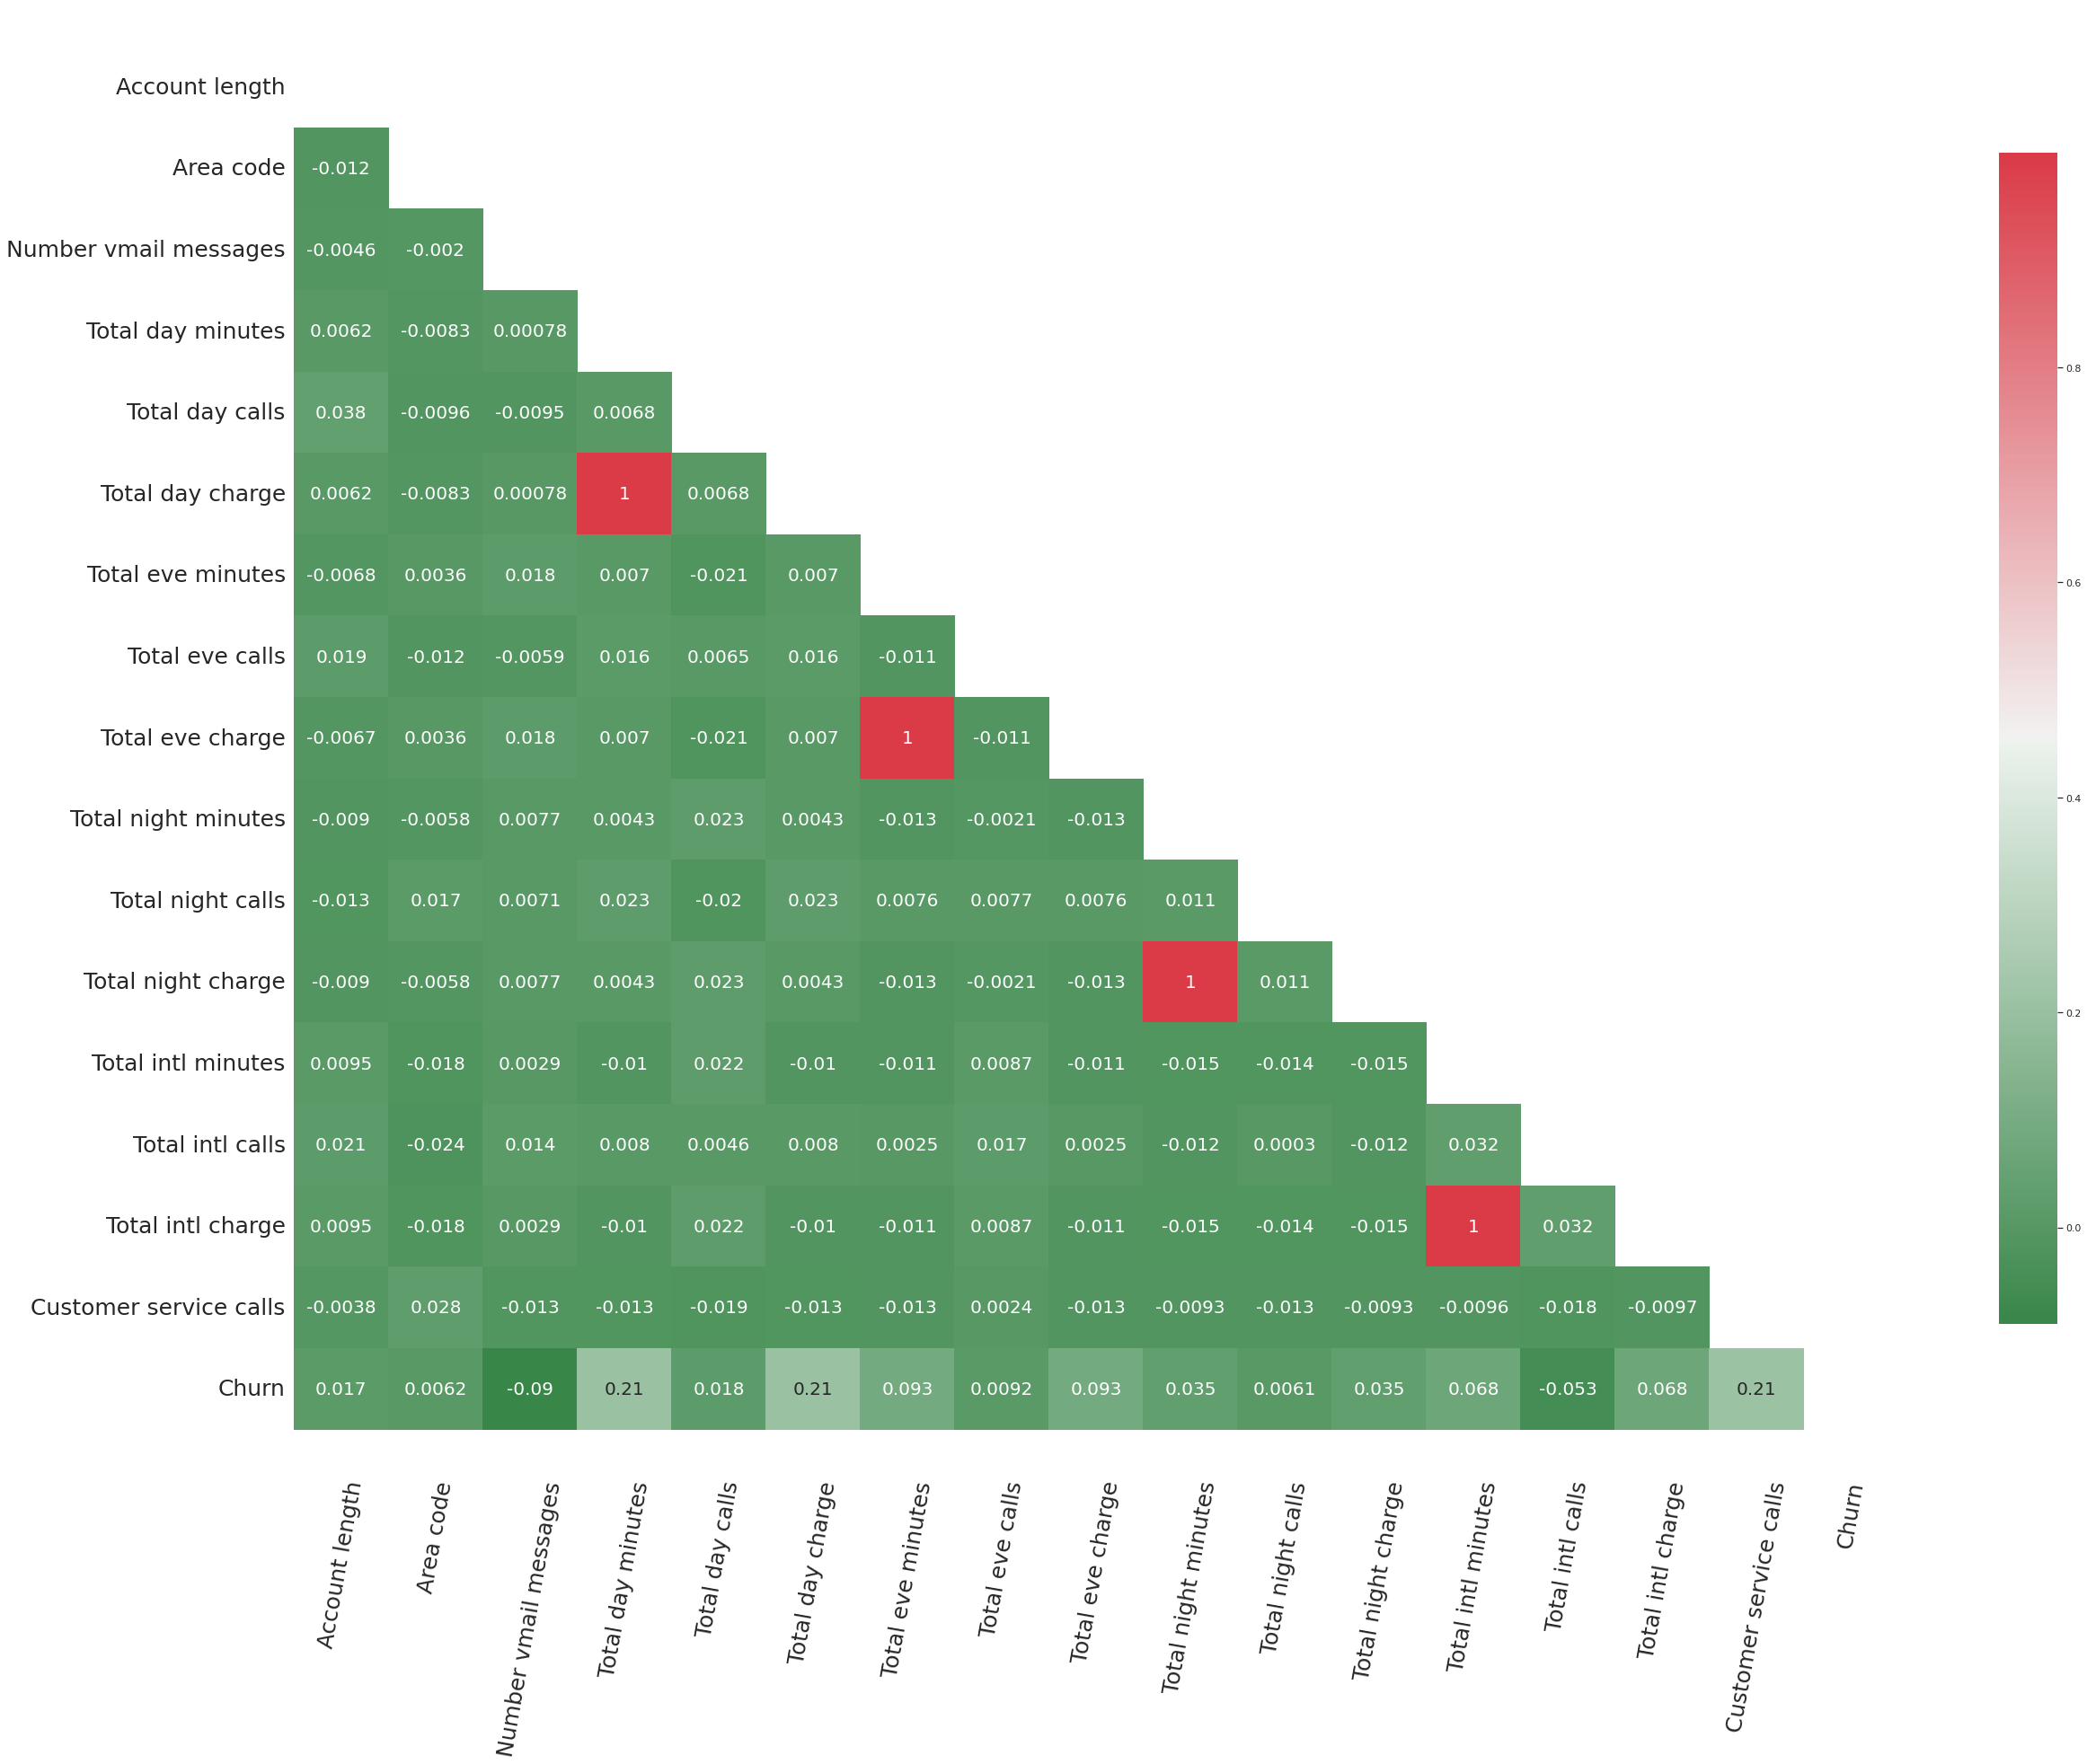

In [55]:
sns.set(style="white")
# Creating the data
data = telcom_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(40,30))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

**Inference:** Correlation between independant variable is ploted. Green = Good (low correlation), Red = Bad (high correlation) between the independent variables. 
Independant variables giving total minutes and total charges of day, evening, night and international calls are showing high correlation.  